Elastic Net is a versatile regularization technique that combines the properties of both Ridge (L2) and Lasso (L1) regression.

---
**4. Elastic Net Regression (L1 + L2 Regularization)**

* **The Idea:** Elastic Net aims to get the best of both worlds:
    * Like Lasso, it can perform feature selection by shrinking some coefficients to exactly zero.
    * Like Ridge, it can handle multicollinearity well and tends to select groups of correlated features together rather than arbitrarily picking one (a behavior sometimes seen with Lasso when many features are highly correlated).
* **Penalty Term:** Elastic Net adds a penalty term that is a linear combination of the L1 and L2 penalties:
    In Scikit-learn's formulation, the cost function for Elastic Net is:
    $$J_{ElasticNet}(b) = MSE + \alpha \cdot \text{l1\_ratio} \sum_{j=1}^{p} |b_j| + \alpha \cdot \frac{1}{2} (1 - \text{l1\_ratio}) \sum_{j=1}^{p} b_j^2$$
* **Hyperparameters:** Elastic Net has two main hyperparameters that need to be tuned:
    1.  **`alpha` ($\alpha \ge 0$):** This is the overall strength of the regularization. A larger `alpha` means stronger regularization (more shrinkage, potentially more coefficients to zero). If `alpha = 0`, it reduces to OLS Linear Regression.
    2.  **`l1_ratio` ($\rho$, where $0 \le \rho \le 1$):** This is the mixing parameter.
        * If `l1_ratio = 1`: Elastic Net behaves like Lasso Regression (pure L1 penalty).
        * If `l1_ratio = 0`: Elastic Net behaves like Ridge Regression (pure L2 penalty).
        * If $0 < \text{l1\_ratio} < 1$: It's a combination of L1 and L2 penalties.
* **Effect of Elastic Net Regression:**
    * It shrinks coefficients and can perform feature selection (like Lasso).
    * It is more robust than Lasso when there are highly correlated predictors; it tends to select or discard them together.
    * It can be particularly useful when the number of predictors ($p$) is much larger than the number of observations ($n$), or when there are many correlated features.
* **Feature Scaling:** As with Ridge and Lasso, **feature scaling is essential** for Elastic Net.

---
**Scikit-learn Implementation:** `sklearn.linear_model.ElasticNet` and `sklearn.linear_model.ElasticNetCV` (for built-in cross-validation to find the best `alpha` and `l1_ratio`).

**Code Example (Elastic Net Regression - Self-Contained):**
This block includes data loading, preprocessing, and fitting OLS, RidgeCV, and LassoCV for comparison.


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, ElasticNetCV # Added ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns # For potentially nicer bar plot
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # To suppress some sklearn warnings

# --- 1. Load and Prepare Data (Essential Setup) ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_df = pd.DataFrame(X, columns=housing.feature_names)

# Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# For coefficient names
feature_names = X_train_raw.columns

print("California Housing Dataset Loaded and Scaled.")
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

California Housing Dataset Loaded and Scaled.
Training features shape: (16512, 8)
Test features shape: (4128, 8)


In [3]:
# --- 2. Fit OLS, RidgeCV, LassoCV for comparison ---
# OLS Model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_mse = mean_squared_error(y_test, ols_model.predict(X_test))
ols_r2 = ols_model.score(X_test, y_test)
print(f"\nOLS Linear Regression MSE: {ols_mse:.4f}, R²: {ols_r2:.4f}")


OLS Linear Regression MSE: 0.5559, R²: 0.5758


In [4]:
# RidgeCV Model
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_cv_model = RidgeCV(alphas=alphas_ridge, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_model.predict(X_test))
ridge_cv_r2 = ridge_cv_model.score(X_test, y_test)
print(f"RidgeCV (L2) MSE: {ridge_cv_mse:.4f}, R²: {ridge_cv_r2:.4f}")

RidgeCV (L2) MSE: 0.5559, R²: 0.5758


In [5]:
# LassoCV Model
alphas_lasso = [0.0001, 0.001, 0.01, 0.1, 1]
lasso_cv_model = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42, n_jobs=-1)
lasso_cv_model.fit(X_train, y_train)
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_model.predict(X_test))
lasso_cv_r2 = lasso_cv_model.score(X_test, y_test)
print(f"LassoCV (L1) MSE: {lasso_cv_mse:.4f}, R²: {lasso_cv_r2:.4f}")

LassoCV (L1) MSE: 0.5545, R²: 0.5769


In [6]:
# --- 3. Elastic Net Regression (L1 + L2 Regularization) ---
print("\n--- Elastic Net Regression (L1 + L2 Regularization) ---")

# --- Plain ElasticNet with chosen alpha and l1_ratio ---
alpha_en = 0.01
l1_ratio_en = 0.5 # Mix of L1 and L2
en_model = ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, max_iter=10000, random_state=42)
en_model.fit(X_train, y_train)

en_predictions = en_model.predict(X_test)
en_mse = mean_squared_error(y_test, en_predictions)
en_r2 = en_model.score(X_test, y_test)
print(f"ElasticNet MSE with alpha={alpha_en}, l1_ratio={l1_ratio_en}: {en_mse:.4f}")
print(f"ElasticNet R-squared: {en_r2:.4f}")
num_zero_coefs_en = np.sum(en_model.coef_ == 0)
print(f"Number of coefficients shrunk to zero by ElasticNet: {num_zero_coefs_en} out of {len(en_model.coef_)}")


--- Elastic Net Regression (L1 + L2 Regularization) ---
ElasticNet MSE with alpha=0.01, l1_ratio=0.5: 0.5500
ElasticNet R-squared: 0.5803
Number of coefficients shrunk to zero by ElasticNet: 1 out of 8


In [7]:
# --- ElasticNetCV to find the best alpha and l1_ratio ---
# ElasticNetCV can search over a list of l1_ratios as well.
en_cv_l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0] # l1_ratio=1 is Lasso
en_cv_alphas = [0.0001, 0.001, 0.01, 0.1, 1] # Can also let ElasticNetCV choose alphas automatically

en_cv_model = ElasticNetCV(l1_ratio=en_cv_l1_ratios, alphas=en_cv_alphas,
                           cv=5, max_iter=10000, random_state=42, n_jobs=-1)
en_cv_model.fit(X_train, y_train)

best_alpha_en_cv = en_cv_model.alpha_
best_l1_ratio_en_cv = en_cv_model.l1_ratio_
print(f"\nBest alpha found by ElasticNetCV: {best_alpha_en_cv:.6f}")
print(f"Best l1_ratio found by ElasticNetCV: {best_l1_ratio_en_cv:.2f}")


Best alpha found by ElasticNetCV: 0.001000
Best l1_ratio found by ElasticNetCV: 1.00


In [9]:
en_cv_predictions = en_cv_model.predict(X_test)
en_cv_mse = mean_squared_error(y_test, en_cv_predictions)
en_cv_r2 = en_cv_model.score(X_test, y_test)
print(f"ElasticNetCV MSE with best params: {en_cv_mse:.4f}")
print(f"ElasticNetCV R-squared: {en_cv_r2:.4f}")

ElasticNetCV MSE with best params: 0.5545
ElasticNetCV R-squared: 0.5769


In [10]:
print("\nCoefficients from ElasticNetCV model:")
en_cv_coefs = pd.Series(en_cv_model.coef_, index=feature_names)
print(en_cv_coefs.sort_values(ascending=False))


Coefficients from ElasticNetCV model:
MedInc        0.849140
AveBedrms     0.326050
HouseAge      0.123346
Population   -0.001062
AveOccup     -0.039890
AveRooms     -0.281273
Longitude    -0.858093
Latitude     -0.885822
dtype: float64


In [11]:
num_zero_coefs_encv = np.sum(en_cv_model.coef_ == 0)
selected_features_encv = feature_names[en_cv_model.coef_ != 0]
print(f"\nNumber of coefficients shrunk to zero by ElasticNetCV: {num_zero_coefs_encv} out of {len(en_cv_model.coef_)}")
print(f"Features selected by ElasticNetCV: {list(selected_features_encv)}")


Number of coefficients shrunk to zero by ElasticNetCV: 0 out of 8
Features selected by ElasticNetCV: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
# --- 4. Comparison Print and Plot ---
print(f"\n--- Performance Comparison (Test Set) ---")
print(f"  OLS Linear Regression MSE: {ols_mse:.4f}, R²: {ols_r2:.4f}")
print(f"  RidgeCV (L2)        MSE: {ridge_cv_mse:.4f}, R²: {ridge_cv_r2:.4f}")
print(f"  LassoCV (L1)        MSE: {lasso_cv_mse:.4f}, R²: {lasso_cv_r2:.4f}")
print(f"  ElasticNetCV        MSE: {en_cv_mse:.4f}, R²: {en_cv_r2:.4f}")


--- Performance Comparison (Test Set) ---
  OLS Linear Regression MSE: 0.5559, R²: 0.5758
  RidgeCV (L2)        MSE: 0.5559, R²: 0.5758
  LassoCV (L1)        MSE: 0.5545, R²: 0.5769
  ElasticNetCV        MSE: 0.5545, R²: 0.5769


In [13]:
# Visualizing Coefficients
plt.figure(figsize=(12, 8)) # Adjusted figure size
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'OLS': ols_model.coef_,
    'RidgeCV': ridge_cv_model.coef_,
    'LassoCV': lasso_cv_model.coef_,
    'ElasticNetCV': en_cv_model.coef_
})
coef_comparison_melted = coef_comparison.melt(id_vars='Feature', var_name='Model', value_name='Coefficient Value')

<Figure size 1200x800 with 0 Axes>

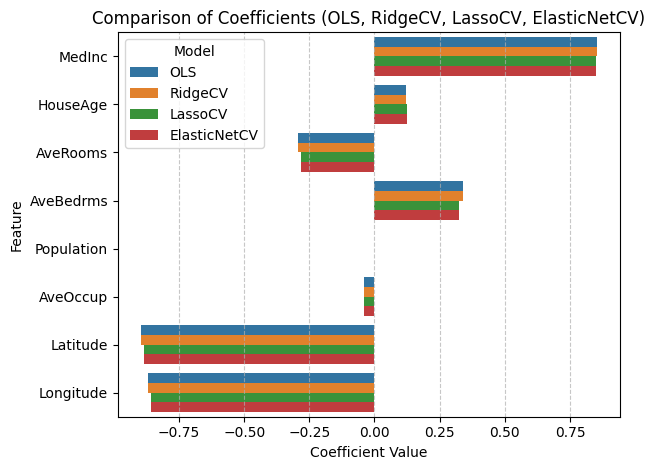

In [14]:
sns.barplot(x='Coefficient Value', y='Feature', hue='Model', data=coef_comparison_melted, orient='h') # Horizontal bar plot
plt.title('Comparison of Coefficients (OLS, RidgeCV, LassoCV, ElasticNetCV)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations from Elastic Net:**
* `ElasticNetCV` will find the best combination of `alpha` and `l1_ratio` from the ones you provide (or its defaults).
* If the best `l1_ratio` is close to 1, it suggests Lasso-like behavior is optimal. If it's close to 0 (though `ElasticNetCV`'s `l1_ratio` typically doesn't go exactly to 0 unless specified as `[0]`), it suggests Ridge-like behavior. Values in between indicate a true mix is beneficial.
* You may see some coefficients shrunk to zero, like Lasso, but the handling of correlated features might be more stable (coefficients for correlated features might be similar rather than one being zeroed out).
* The performance of Elastic Net can sometimes be the best of the regularized models, especially on datasets with complex correlation structures among features.

This completes the trio of commonly used regularized linear models. Each has its strengths, and Elastic Net provides a flexible way to blend the characteristics of Ridge and Lasso.